In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LSTM, Flatten, InputLayer, Conv1D, MaxPooling1D
from keras.layers import Dropout, BatchNormalization, Bidirectional
from sklearn.model_selection import train_test_split  
from tensorflow.keras.utils import plot_model,to_categorical
import time

import pandas as pd  
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

import random as rn
import tensorflow as tf

In [2]:
X = np.load("X_mfcc_jpt.npy")
y = np.load("y_mfcc_jpt.npy")
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [3]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(2658, 12, 193) (665, 12, 193)
(2658,) (665,)


In [4]:
def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(12,193))) 
    model.add(LSTM(64, return_sequences=(True)))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(256))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
              
    # model compilation
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])  
    return model

In [5]:
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [6]:
model = create_model()
hist = model.fit(train_x, train_y, epochs=100,callbacks=[checkpoint],steps_per_epoch =5, validation_split=0.2)  

Epoch 1/100
5/5 [==============================] - 6s 512ms/step - loss: 0.5822 - accuracy: 0.7060 - val_loss: 0.4776 - val_accuracy: 0.8308

Epoch 00001: val_accuracy improved from -inf to 0.83083, saving model to model.h5
Epoch 2/100
5/5 [==============================] - 1s 295ms/step - loss: 0.4433 - accuracy: 0.8151 - val_loss: 0.4585 - val_accuracy: 0.8365

Epoch 00002: val_accuracy improved from 0.83083 to 0.83647, saving model to model.h5
Epoch 3/100
5/5 [==============================] - 1s 303ms/step - loss: 0.4333 - accuracy: 0.8264 - val_loss: 0.4695 - val_accuracy: 0.8421

Epoch 00003: val_accuracy improved from 0.83647 to 0.84211, saving model to model.h5
Epoch 4/100
5/5 [==============================] - 2s 398ms/step - loss: 0.3988 - accuracy: 0.8391 - val_loss: 0.4684 - val_accuracy: 0.8440

Epoch 00004: val_accuracy improved from 0.84211 to 0.84398, saving model to model.h5
Epoch 5/100
5/5 [==============================] - 3s 669ms/step - loss: 0.3765 - accuracy: 0.8

5/5 [==============================] - 2s 459ms/step - loss: 0.1332 - accuracy: 0.9558 - val_loss: 0.8903 - val_accuracy: 0.8571

Epoch 00041: val_accuracy did not improve from 0.86090
Epoch 42/100
5/5 [==============================] - 2s 464ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 1.0053 - val_accuracy: 0.8421

Epoch 00042: val_accuracy did not improve from 0.86090
Epoch 43/100
5/5 [==============================] - 2s 454ms/step - loss: 0.0774 - accuracy: 0.9774 - val_loss: 1.0854 - val_accuracy: 0.8440

Epoch 00043: val_accuracy did not improve from 0.86090
Epoch 44/100
5/5 [==============================] - 2s 476ms/step - loss: 0.1019 - accuracy: 0.9727 - val_loss: 0.8570 - val_accuracy: 0.8459

Epoch 00044: val_accuracy did not improve from 0.86090
Epoch 45/100
5/5 [==============================] - 2s 507ms/step - loss: 0.0663 - accuracy: 0.9807 - val_loss: 1.0181 - val_accuracy: 0.8383

Epoch 00045: val_accuracy did not improve from 0.86090
Epoch 46/100
5/5 [=====

5/5 [==============================] - 2s 448ms/step - loss: 0.0744 - accuracy: 0.9760 - val_loss: 1.0378 - val_accuracy: 0.8383

Epoch 00082: val_accuracy did not improve from 0.86090
Epoch 83/100
5/5 [==============================] - 2s 471ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 1.1178 - val_accuracy: 0.8365

Epoch 00083: val_accuracy did not improve from 0.86090
Epoch 84/100
5/5 [==============================] - 2s 505ms/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 1.1403 - val_accuracy: 0.8308

Epoch 00084: val_accuracy did not improve from 0.86090
Epoch 85/100
5/5 [==============================] - 2s 444ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 1.2219 - val_accuracy: 0.8308

Epoch 00085: val_accuracy did not improve from 0.86090
Epoch 86/100
5/5 [==============================] - 2s 470ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 1.2128 - val_accuracy: 0.8308

Epoch 00086: val_accuracy did not improve from 0.86090
Epoch 87/100
5/5 [=====

Accuracy: 78.50%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


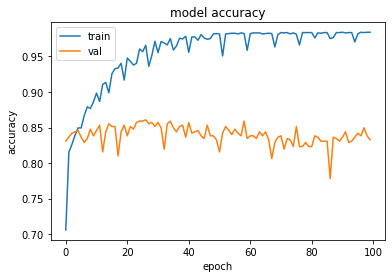

In [7]:
# Final evaluation of the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

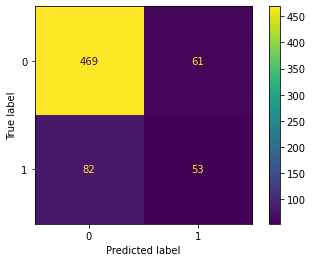

In [9]:
y_pred = model.predict(test_x)
for i in range(0,len(y_pred)) :
    selisih_to_0 = abs(0-y_pred[i][0])
    selisih_to_1 = abs(1-y_pred[i][0])
    if(min(selisih_to_0, selisih_to_1) == selisih_to_0):
        y_pred[i][0] = 0
    else:
        y_pred[i][0] = 1
cm = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [10]:
tp, tn = cm[0, 0], cm[1, 1]
fn, fp = cm[1, 0], cm[0, 1]
    
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
    
uar = (specificity + sensitivity)/2.0
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(uar)
print(accuracy)

0.6580459770114943
0.7849624060150376
